# Neural Network
### Using (x-mean)/std normalization

In [25]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras import regularizers
from keras.utils import np_utils, to_categorical

In [26]:
# Reading the csv dataset
eeg_raw = pd.read_csv(r'Dataset/one_to_five.csv')

In [ ]:
# Previewing the imported dataset
eeg_raw

In [28]:
# dropping 'y' & 'Unnamed: 180' columns
eeg_raw_drop_out = eeg_raw.drop(['y','Unnamed: 180' ], axis = 1)

# dropping 'Unnamed: 0' column
eeg_raw_drop_io = eeg_raw_drop_out.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# previewing dataset after dropping required columns
eeg_raw_drop_io

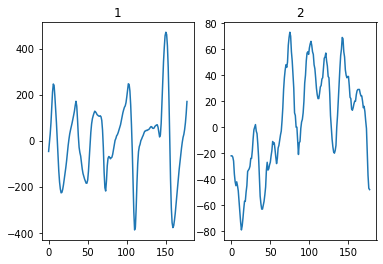

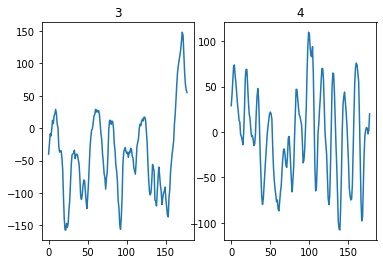

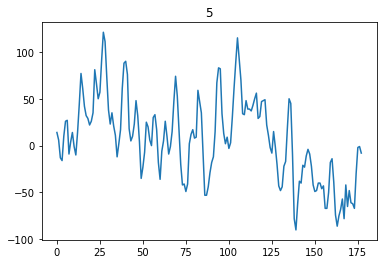

In [106]:
# 1 = An Epileptic Waveform
# 2,3,4,5 = A Non-Epileptic Waveform
plt.subplot(1,2,1)
plt.title('1')
plt.plot(range(178),eeg_raw_drop_io.iloc[11496,0:178])

plt.subplot(1,2,2)
plt.title('2')
plt.plot(range(178),eeg_raw_drop_io.iloc[11495,0:178])
plt.show()

plt.subplot(1,2,1)
plt.title('3')
plt.plot(range(178),eeg_raw_drop_io.iloc[11498,0:178])

plt.subplot(1,2,2)
plt.title('4')
plt.plot(range(178),eeg_raw_drop_io.iloc[11499,0:178])
plt.show()

plt.subplot(1,1,1)
plt.title('5')
plt.plot(range(178),eeg_raw_drop_io.iloc[11497,0:178])
plt.show()

In [56]:
eeg_raw_drop_io.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 178 entries, X1 to X178
dtypes: int64(178)
memory usage: 15.6 MB


In [30]:
# Normalization
mean = np.mean(eeg_raw_drop_io, axis = 0)
std = np.std(eeg_raw_drop_io, axis = 0)
norm_input = (eeg_raw_drop_io - mean)/std

In [ ]:
norm_input

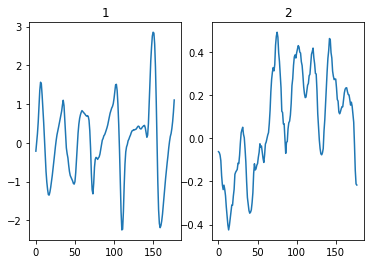

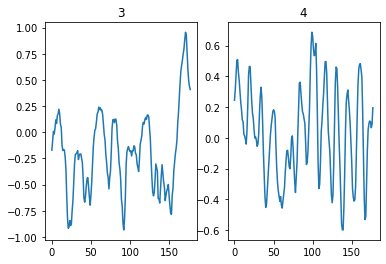

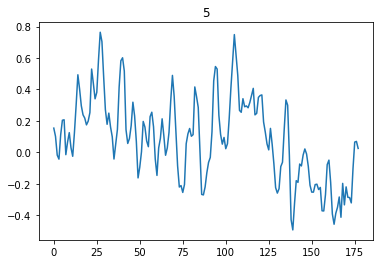

In [107]:
# 1 = An Epileptic Normalized Waveform
# 2,3,4,5 = A Non-Epileptic Normalized Waveform
plt.subplot(1,2,1)
plt.title('1')
plt.plot(range(178),norm_input.iloc[11496,0:178])

plt.subplot(1,2,2)
plt.title('2')
plt.plot(range(178),norm_input.iloc[11495,0:178])
plt.show()

plt.subplot(1,2,1)
plt.title('3')
plt.plot(range(178),norm_input.iloc[11498,0:178])

plt.subplot(1,2,2)
plt.title('4')
plt.plot(range(178),norm_input.iloc[11499,0:178])
plt.show()

plt.subplot(1,1,1)
plt.title('5')
plt.plot(range(178),norm_input.iloc[11497,0:178])
plt.show()

In [32]:
# Preparing Output

# classes = ['Recording of seizure activites','Healthy Patient EEG from Tumour region','Healthy Patient EEG from Healthy region','Healthy Patient EEG with Eyes Close','Healthy Patient EEG with Eyes Open']
raw_y = eeg_raw['y']
targ = pd.DataFrame(list(zip(raw_y)),columns=['one_hot_y'])
# Converting classes into one_hot encoded
target = pd.get_dummies(targ.one_hot_y)
# previewing the one_hot encoded result
target

,1,2,3,4,5
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11495,0,1,0,0,0
11496,1,0,0,0,0
11497,0,0,0,0,1
11498,0,0,1,0,0


In [33]:
# Alternative
#ids = np.array(raw_y)
#encoded_y = to_categorical(ids)
#encoded_y
##### invert = argmax(encoded_y[0])

In [34]:
# converting input and target into array
norm_input_array = np.array(norm_input)
target_array = np.array(target)

In [35]:
norm_input_array

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [36]:
target_array

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [37]:
print("Input Shape: ", norm_input_array.shape)
print("Output Shape: ", target_array.shape)
print("Input Datatype: ", norm_input_array.dtype)
print("Output Datatype: ", target_array.dtype)

Input Shape:  (11500, 178)
Output Shape:  (11500, 5)
Input Datatype:  float64
Output Datatype:  uint8


In [38]:
# Shuffle the dataset
x, y = shuffle(norm_input_array, target_array)

# Splitting x and y, X = 60%, Y = 60%
X_train, x_test = train_test_split(x, test_size = 0.4, shuffle = False)
Y_train, y_test = train_test_split(y, test_size = 0.4, shuffle = False)

# Splitting X_test and Y_test into 20% of the overall dataset  
X_cv, X_test = train_test_split(x_test, test_size = 0.5, shuffle = False)
Y_cv, Y_test = train_test_split(y_test, test_size = 0.5, shuffle = False)

In [39]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_cv shape: ", X_cv.shape)
print("Y_cv shape: ", Y_cv.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (8050, 178)
Y_train shape:  (8050, 5)
X_cv shape:  (1725, 178)
Y_cv shape:  (1725, 5)
X_test shape:  (1725, 178)
Y_test shape:  (1725, 5)


In [125]:
model = Sequential()
model.add(Dense(534, activation='relu',
                kernel_regularizer = regularizers.l1(0.001),
               input_shape = (178,)))
model.add(Dropout(0.5))
model.add(Dense(534, activation='relu',
               kernel_regularizer = regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu',
               kernel_regularizer = regularizers.l1(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
print('Network Architecture Defined')

Network Architecture Defined


In [126]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])
print('model is now ready to use')

model is now ready to use


In [127]:
history = model.fit(X_train, Y_train, 
                    batch_size = 128, epochs = 85,
         verbose = 1, validation_data = (X_cv, Y_cv))

Train on 8050 samples, validate on 1725 samples
Epoch 1/85
8050/8050 [==============================] - 24s 3ms/step - loss: 12.1085 - accuracy: 0.3198 - val_loss: 6.5186 - val_accuracy: 0.4707
Epoch 2/85
8050/8050 [==============================] - 20s 3ms/step - loss: 3.9097 - accuracy: 0.4689 - val_loss: 2.3486 - val_accuracy: 0.4597
Epoch 3/85
8050/8050 [==============================] - 20s 3ms/step - loss: 1.9180 - accuracy: 0.4507 - val_loss: 1.6558 - val_accuracy: 0.4568
Epoch 4/85
8050/8050 [==============================] - 21s 3ms/step - loss: 1.5756 - accuracy: 0.4467 - val_loss: 1.4995 - val_accuracy: 0.4586
Epoch 5/85
8050/8050 [==============================] - 22s 3ms/step - loss: 1.4851 - accuracy: 0.4477 - val_loss: 1.4379 - val_accuracy: 0.4701
Epoch 6/85
8050/8050 [==============================] - 21s 3ms/step - loss: 1.4451 - accuracy: 0.4532 - val_loss: 1.4150 - val_accuracy: 0.4899
Epoch 7/85
8050/8050 [==============================] - 21s 3ms/step - loss: 1.42

Epoch 57/85
8050/8050 [==============================] - 19s 2ms/step - loss: 1.1484 - accuracy: 0.5974 - val_loss: 1.0651 - val_accuracy: 0.6499
Epoch 58/85
8050/8050 [==============================] - 19s 2ms/step - loss: 1.1497 - accuracy: 0.6016 - val_loss: 1.0670 - val_accuracy: 0.6452
Epoch 59/85
8050/8050 [==============================] - 20s 3ms/step - loss: 1.1593 - accuracy: 0.5968 - val_loss: 1.0755 - val_accuracy: 0.6464
Epoch 60/85
8050/8050 [==============================] - 22s 3ms/step - loss: 1.1517 - accuracy: 0.5985 - val_loss: 1.0594 - val_accuracy: 0.6499
Epoch 61/85
8050/8050 [==============================] - 21s 3ms/step - loss: 1.1459 - accuracy: 0.5961 - val_loss: 1.0648 - val_accuracy: 0.6423
Epoch 62/85
8050/8050 [==============================] - 22s 3ms/step - loss: 1.1525 - accuracy: 0.5963 - val_loss: 1.0601 - val_accuracy: 0.6464
Epoch 63/85
8050/8050 [==============================] - 22s 3ms/step - loss: 1.1574 - accuracy: 0.5940 - val_loss: 1.0689 -

In [128]:
score = model.evaluate(X_test, Y_test, verbose =1)

1725/1725 [==============================] - 2s 1ms/step


In [129]:
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  1.054461499988169
Test accuracy:  0.6428985595703125


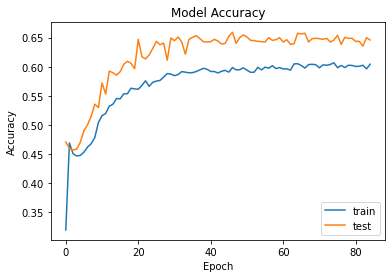

In [130]:
#plt.subplot(no._row, no_column, plot_number)
plt.subplot(1,1,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')

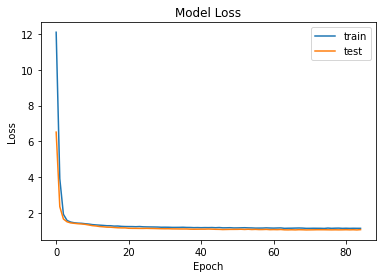

In [131]:
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')